In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
from sklearn.feature_selection import mutual_info_classif

sns.set()
warn.filterwarnings('ignore')

In [2]:
# Reading data
df1 = pd.read_csv('../data/dataset.csv')
df2 = pd.read_csv('../data/TCS.BO.csv')

# Adding price column to the indicator dataset
n = df1['Date'].size
df2Close = df2['Close'].to_list()
df2Date = df2['Date'].to_list()
prices = []
for i in range(n):
    df1Date = df1['Date'].iloc[i]
    price = df2Close[df2Date.index(df1Date)]
    prices.append(price)

df1['Price'] = prices
features = df1.columns[1:-1]

# Building the final datset to be used throughout
df = pd.concat([df1['Date'],df1['Price'],df1[features]], axis=1)
df.head()

,Date,Price,Volume,AO,ROC_12,ROC_26,ROC_50,ROC_200,EMA_12,EMA_26,...,WILLR_125,VWMA_14,VWMA_20,STOCH_d,STOCH_k,SMA_12,SMA_26,SMA_50,SMA_200,Signal
0,12-11-2002,36.974998,42304,7.932132,1.405545,-1.465698,-12.588655,-3.710945,43.493023,43.816629,...,-97.498357,44.108333,42.767381,0.145167,0.035445,43.116667,43.115866,44.26300,56.377938,WAIT
1,13-11-2002,36.625000,40440,-6.857685,2.268761,-4.498041,-15.561960,-2.104907,42.436404,43.283916,...,-97.959185,43.364286,42.346964,0.035870,0.033248,43.184375,43.049519,44.12800,56.374000,BUY
2,14-11-2002,37.062500,57552,-6.955552,2.382595,-1.133709,-13.582048,-1.690983,41.609649,42.823070,...,-97.383148,42.682262,41.974107,0.034403,0.034516,43.256250,43.033173,44.01150,56.370813,WAIT
3,15-11-2002,37.937500,76520,-6.895258,3.161111,1.369408,-8.639377,-1.043369,41.044703,42.461176,...,-96.231074,42.111191,41.688869,0.035050,0.037384,43.353125,43.052885,43.93975,56.368813,WAIT
4,18-11-2002,38.325001,133176,-6.703199,2.576117,0.590557,-6.008585,-0.583654,40.626287,42.154793,...,-95.720869,41.571548,41.445774,0.037440,0.040419,43.433333,43.061539,43.89075,56.367688,WAIT


In [3]:
# Data split: 70% training, 30% testing
# Since it's a time-series data, we only need to select the first 70% data points for training
from math import floor
n = df['Date'].size
X_train = df.iloc[0:floor(n*0.7), 2:-1]
X_test = df.iloc[floor(n*0.7):, 2:-1]
y_train = df.iloc[0:floor(n*0.7), -1]
y_test = df.iloc[floor(n*0.7):, -1]

Text(0.5, 0, 'Mutual Information Gain')

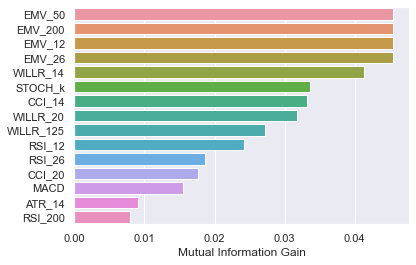

In [6]:
# Finding the mutual information gain of all features
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.columns[2:-1]
ig = mutual_info.sort_values(ascending=False)[:15]

# Plotting the information gains as a descending order list
sns.barplot(x=ig.to_list(),
y=['EMV_50','EMV_200','EMV_12','EMV_26','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12','RSI_26',
'CCI_20','MACD','ATR_14','RSI_200'], orient='h')
plt.xlabel('Mutual Information Gain')

In [7]:
# List of top 15 features selected for use
features = ['EMV_50','EMV_200','EMV_12','EMV_26','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12',
'RSI_26','CCI_20','MACD','ATR_14','RSI_200']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

<AxesSubplot:>

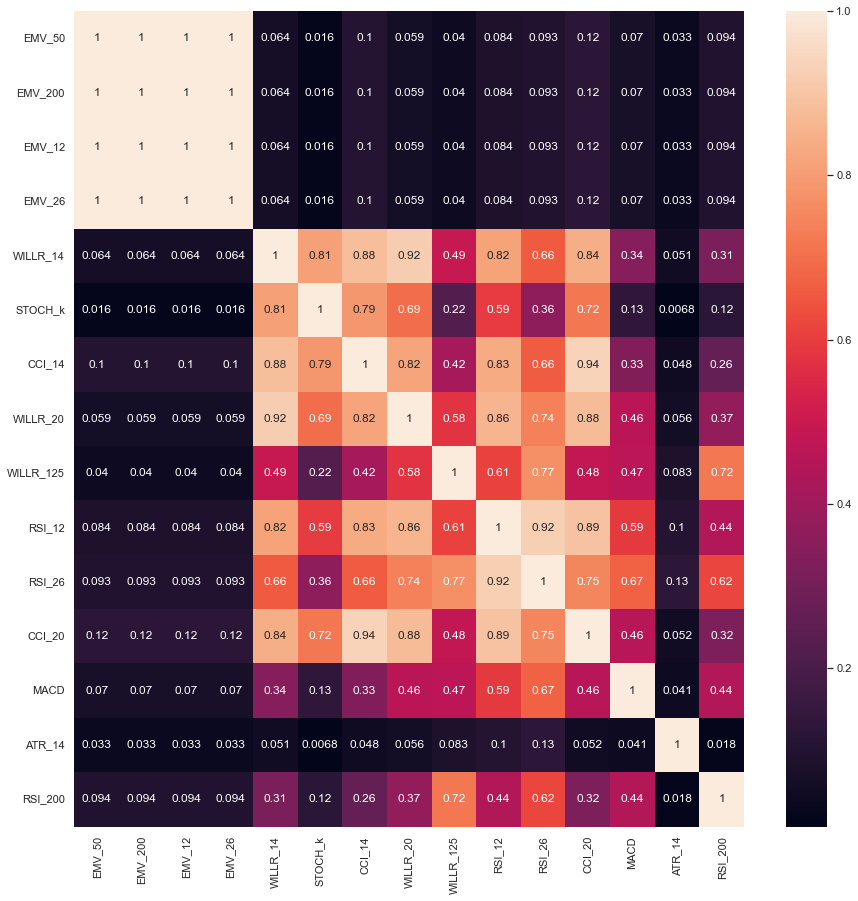

In [8]:
# Analysis of the extracted features
corr = df[features].corr().abs()
fig = plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True)

__Analysis:__ Since all the EMVs are fully correlated to each other, we can make do with any one of them. Let's take up EMV_50. So, the feature list can be further trimmed as follows: 

<AxesSubplot:>

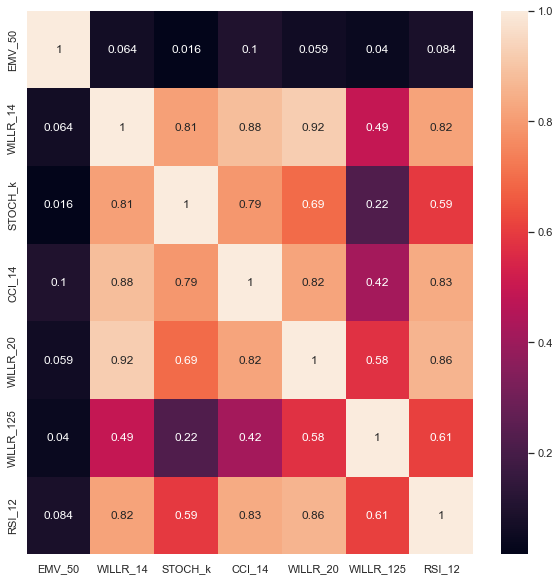

In [9]:
# Picking 10 out of these 15 based on absolute correlation 
features = ['EMV_50','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

# Finding absolute correlation matrix for these 10 selected features
corr = df[features].corr().abs()
fig = plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True)